<h1 style="color:rgb(0,120,170)">Assignment 3</h1>

<h2 style="color:rgb(208,90,80)">Topic: PCA, Kernel PCA</h2>
<h2 style="color:rgb(0,120,170)">Machine Learning: Unsupervised Techniques, SS 2019</h2>

<h3 style="color:rgb(0,120,170)">Deadline April 7th 2019, 24:00</h3>
Return this notebook with your code and answers.

# Bonus Exercise 5

This exercise is not mandatory, but you might get extra credits! Our aim is to discuss a certain aspect of the mathematical derivation of PCA, that has not been adressed in full detail in the lectures. We use the same notation as in the lecture, i.e. we are given a data matrix $\mathbf{X}=\{ \mathbf{x}_1,...,\mathbf{x}_n \}$, where each $\mathbf{x}_i \in \mathbb{R}^m$ for $1\le i \le n$. 

<h3 style="color:rgb(0,120,170)">Question 5.1:</h3>

A main reason, why PCA worked very well, is the fact that the covariance matrix, defined as $\mathbf{C}=\frac 1n \mathbf{X}\mathbf{X^T}$, or equivalently, $c_{st}=\frac1n \sum_{i=1}^n x_{is} x_{it}$, is positive semi-definite. Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. Moreover show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are nonnegative. Why is this an important fact in PCA?  
Hint: To prove the second statement, compute $\left\langle\mathbf{C}\mathbf{u},\mathbf{u}  \right\rangle$ for an eigenvector 
$\mathbf{u}$ of $\mathbf{C}$. 
* <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 5.1:</h3>

* your answer.

# Exercise 6

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1 . This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [1]:
#read data. Nothing to do here
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
# import data from csv file,
data = np.genfromtxt('faces94.csv', delimiter=',')

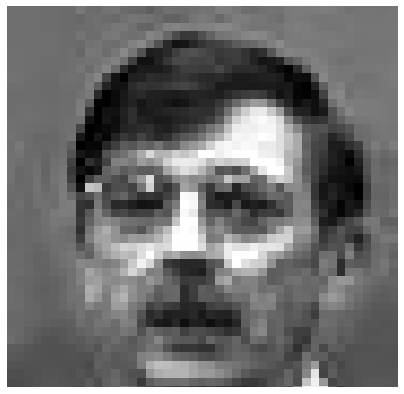

In [2]:
#plot first image as an example. Nothing to do here
def plotImg(x, title=''):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis('off')
    plt.title(title)
    plt.show()
# plot first img
plotImg(data[0, :])

<h3 style="color:rgb(0,120,170)">Question 6.1:</h3>

We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

* <span style="color:rgb(0,120,170)">**TODO:** Code</span>

<h3 style="color:rgb(208,90,80)">Answer 6.1:</h3>

In [3]:
pca = PCA().fit(data)

In [4]:
def min_required(pca, variance):
    min_req = np.argwhere(pca.explained_variance_ratio_.cumsum() >= variance).min() + 1
    return min_req, pca.explained_variance_ratio_[:min_req]

print(min_required(pca, 0.5))
print(min_required(pca, 0.75))
print(min_required(pca, 0.99))

(4, array([0.26889478, 0.13191195, 0.06730198, 0.04606538]))
(18, array([0.26889478, 0.13191195, 0.06730198, 0.04606538, 0.03630817,
       0.03164298, 0.02929031, 0.02328814, 0.01893229, 0.01621843,
       0.01557262, 0.01304854, 0.01204164, 0.01149976, 0.00941469,
       0.00916721, 0.00803153, 0.00758796]))
(367, array([2.68894776e-01, 1.31911951e-01, 6.73019790e-02, 4.60653825e-02,
       3.63081658e-02, 3.16429762e-02, 2.92903087e-02, 2.32881383e-02,
       1.89322933e-02, 1.62184252e-02, 1.55726232e-02, 1.30485396e-02,
       1.20416386e-02, 1.14997609e-02, 9.41469099e-03, 9.16720862e-03,
       8.03153425e-03, 7.58795871e-03, 7.27536988e-03, 6.93194089e-03,
       6.30702823e-03, 6.26198787e-03, 6.02669612e-03, 5.79311060e-03,
       5.42252494e-03, 5.08643198e-03, 4.95656752e-03, 4.75194403e-03,
       4.60653269e-03, 4.25497926e-03, 4.07760563e-03, 3.82924571e-03,
       3.68205608e-03, 3.47807786e-03, 3.39766242e-03, 3.35849989e-03,
       3.09811768e-03, 3.02223488e-03, 2.95

<h3 style="color:rgb(0,120,170)">Question 6.2:</h3>

You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct. 


* <span style="color:rgb(0,120,170)">**TODO:** Code</span>

<h3 style="color:rgb(208,90,80)">Answer 6.2:</h3>

In [5]:
for var in [0.5, 0.75, .99]:
    components, _ = min_required(pca, var)
    down = PCA(n_components=components).fit(data)

    transformed = down.transform(data)
    
    inverse = down.inverse_transform(transformed)
    print(f'Original shape: {data.shape} | new shape: {inverse.shape}')
    print('Original Data:')
    print(data)
    print(f'Transformed Data ({var * 100}% information):')
    print(inverse)
    print()

Original shape: (3059, 2250) | new shape: (3059, 2250)
Original Data:
[[0.43137255 0.43137255 0.43137255 ... 0.35294118 0.3372549  0.34117647]
 [0.16078431 0.16470588 0.16862745 ... 0.04705882 0.61960784 0.8       ]
 [0.45882353 0.46666667 0.47843137 ... 0.36078431 0.34117647 0.34117647]
 ...
 [0.35294118 0.35686275 0.36862745 ... 0.39215686 0.40392157 0.40784314]
 [0.25882353 0.25882353 0.25098039 ... 0.18039216 0.22352941 0.24705882]
 [0.4627451  0.46666667 0.47058824 ... 0.42745098 0.51372549 0.46666667]]
Transformed Data (50.0% information):
[[0.42840861 0.43059104 0.43091659 ... 0.38034431 0.39873541 0.3959571 ]
 [0.23631951 0.23651484 0.23589324 ... 0.22360003 0.28735804 0.32794513]
 [0.51343113 0.51558086 0.51575554 ... 0.4117467  0.38788724 0.36207774]
 ...
 [0.38330421 0.38472299 0.38627734 ... 0.29896576 0.33240777 0.33502289]
 [0.2472381  0.24740341 0.24664083 ... 0.2579839  0.3178069  0.36105964]
 [0.42345184 0.42465807 0.42334742 ... 0.33008079 0.3170863  0.30851161]]

Ori

<h3 style="color:rgb(0,120,170)">Question 6.3:</h3>

Plot a few of the images and their reconstructions.

* <span style="color:rgb(0,120,170)">**TODO:** Code</span>

<h3 style="color:rgb(208,90,80)">Answer 6.3:</h3>

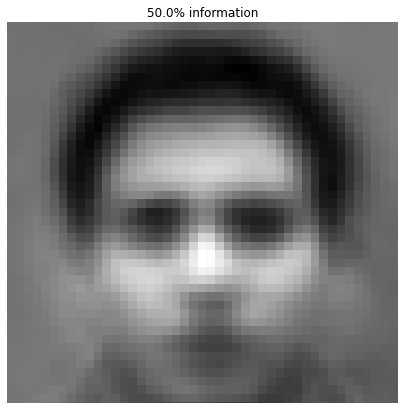

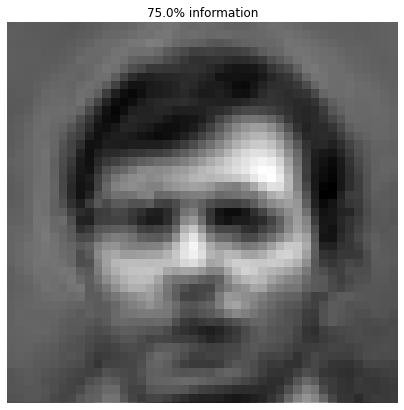

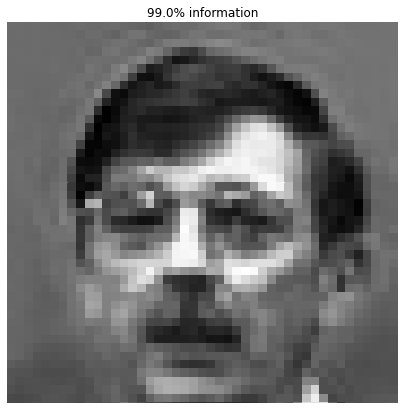

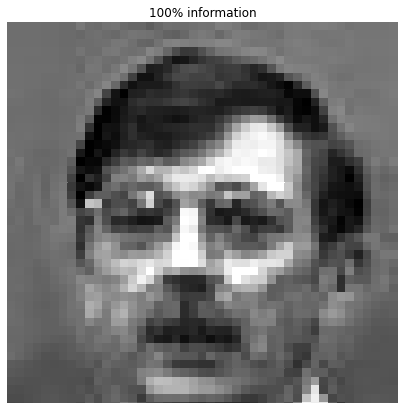

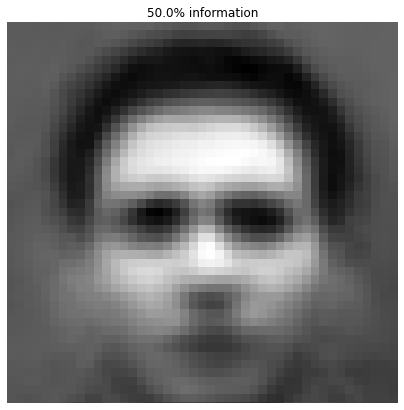

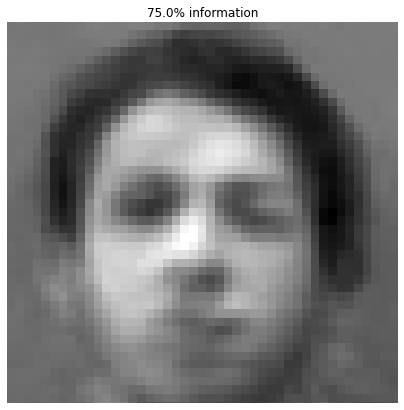

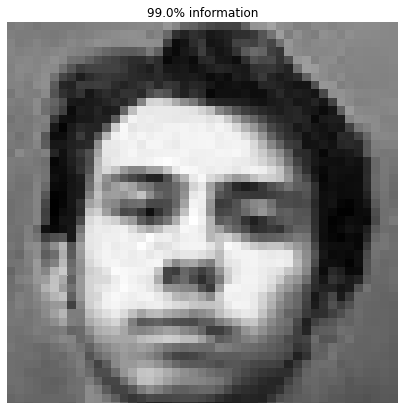

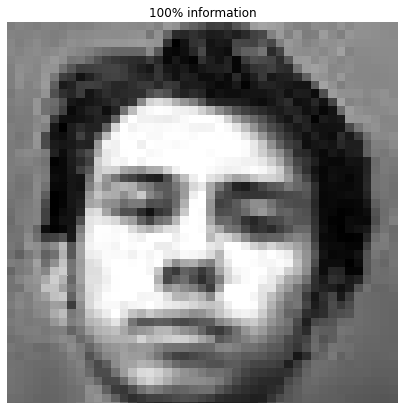

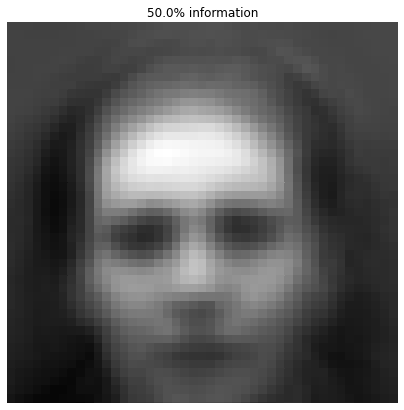

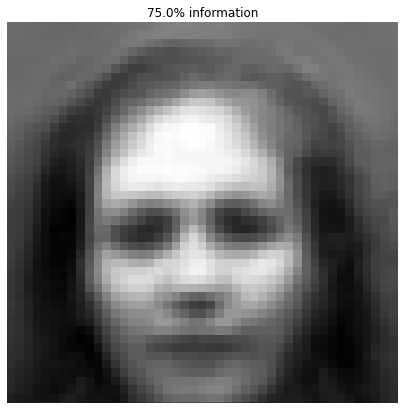

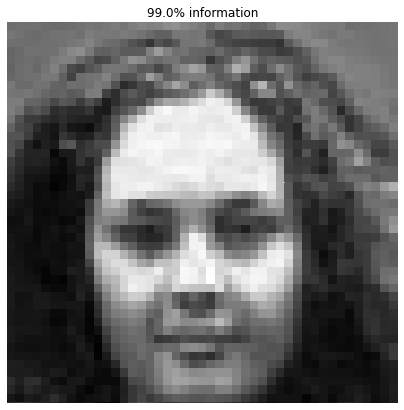

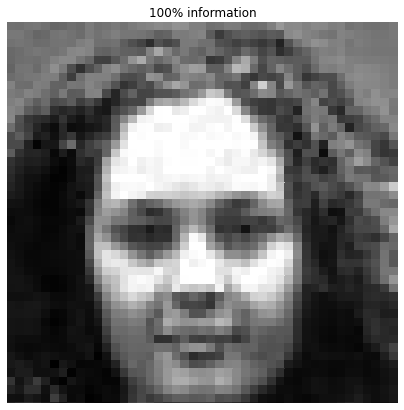

In [6]:
def plot_comparison(index):
    for var in [0.5, 0.75, .99]:
        components, _ = min_required(pca, var)
        down = PCA(n_components=components).fit(data)

        transformed = down.transform(data)

        inverse = down.inverse_transform(transformed)
        plotImg(inverse[index, :], '{:.1f}% information'.format(var * 100))
    plotImg(data[index, :], '100% information')
    
for i in [0, 10, 123]:
    plot_comparison(i)

<h3 style="color:rgb(0,120,170)">Question 6.4:</h3>

Comment on your observations. What type of
information is preserved, what is lost?

* <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 6.4:</h3>

The most informative regions of the image are kept even after downprojecting the data (a lot):
- eyes
- mouth
- nose
- (ears)
- shape of the face (although more symmetric than the original image)
- hair
- contrast (color intensity on a black-white scale)

On the other hand, regions that have less information are smoothed out (lost):
- background
- minor color changes on forehead and cheeks

---

So even when downprojected onto 4 dimensions we - as humans - can somewhat easily identify a human face, although we cannot accurately infer information concerning gender, hair, glasses, age, etc. 

---

For all three examples provided above the first image (50%) roughly look alike, so we cannot infer any further information from them.

On the second image (75%) we can start to see more differentiated features like hair, lips and nose. Also the face becomes less symmetric. 

The third image (99%) almost corresponds 1:1 with the original image. Only some individual pixels are slightly off. 

# Exercise 7

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the last data set has as a third column also a label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally seperate label from date:

In [7]:
#Read data. Nothing to do here!
data3 = np.genfromtxt('pca3.csv', delimiter = ',', skip_header = 0) 
data4 = np.genfromtxt('pca4.csv', delimiter = ',', skip_header = 0)

<h3 style="color:rgb(0,120,170)">Question 7.1:</h3>

Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

* <span style="color:rgb(0,120,170)">**TODO:** Code</span>

<h3 style="color:rgb(208,90,80)">Answer 7.1:</h3>

In [8]:
from sklearn.preprocessing import StandardScaler

#data3_s = StandardScaler(with_std=False).fit_transform(data3)
#data4_s = StandardScaler(with_std=False).fit_transform(data4[:, :-1])
data4_r = data4[:, :-1]
data4_l = data4[:, -1]

# See cell 6 of https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0))

# plot data
def plot_pca(pca, data, colors='blue'):
    plt.figure(figsize=(7, 7))
    plt.scatter(data[:, 0], data[:, 1], color=colors, alpha=0.4)
    for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
        v = vector * length * 10
        draw_vector(pca.mean_, pca.mean_ + v)
    plt.show()

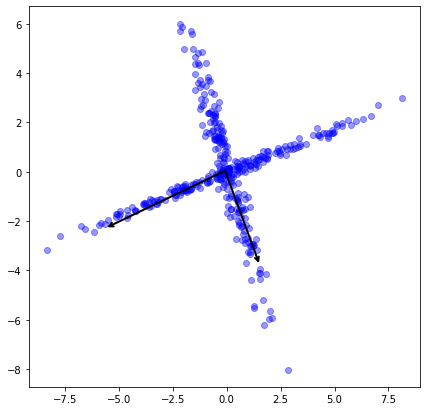

In [9]:
pca3 = PCA().fit(data3)

plot_pca(pca3, data3)

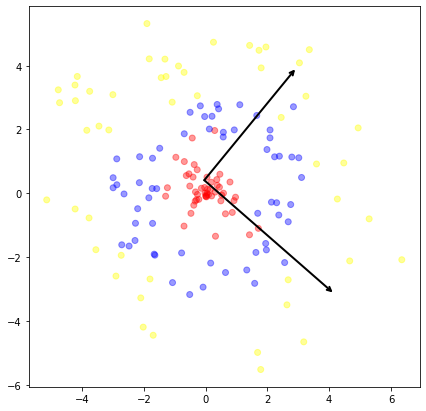

In [10]:
pca4 = PCA().fit(data4_r)

plot_pca(pca4, data4_r, [['red', 'blue', 'yellow'][i] for i in data4_l.astype(int) - 1])

<h3 style="color:rgb(0,120,170)">Question 7.2:</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged ;)) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection on the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 


* <span style="color:rgb(0,120,170)">**TODO:** Code</span>

<h3 style="color:rgb(208,90,80)">Answer 7.2:</h3>

In [11]:
def plot_kernel_pca(pca, data, colors, title, xlabel='PC1', ylabel='PC2'):
    transformed = pca.fit_transform(data)
    plt.figure(figsize=(9, 9))
    plt.scatter(transformed[:, 0], transformed[:, 1], color=colors, alpha=0.4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

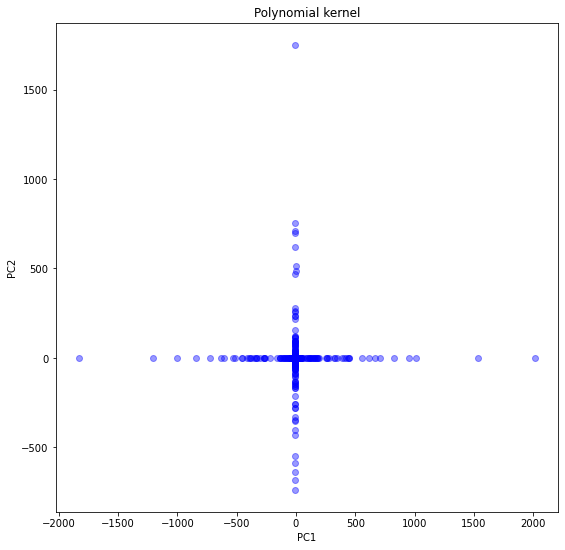

In [12]:
plot_kernel_pca(KernelPCA(gamma=2, degree=3, kernel='poly'), data3, 'blue', 'Polynomial kernel')

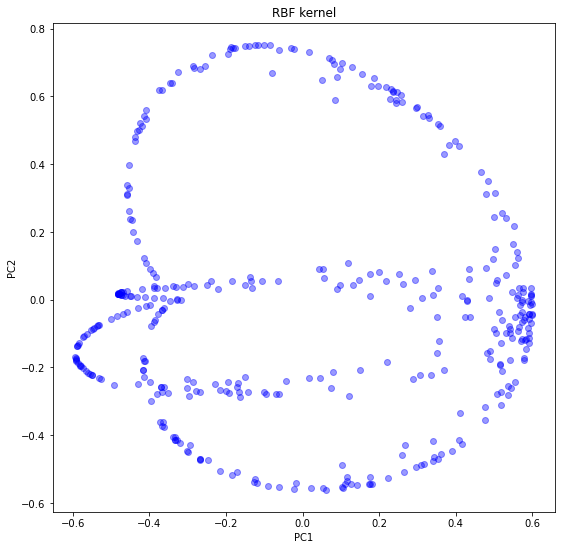

In [13]:
plot_kernel_pca(KernelPCA(gamma=0.25, kernel='rbf'), data3, 'blue', 'RBF kernel')

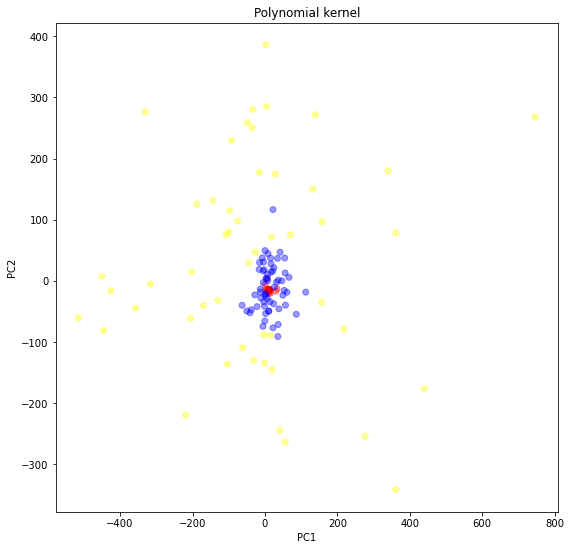

In [14]:
plot_kernel_pca(
    KernelPCA(gamma=2, degree=3, kernel='poly'),
    data4_r, 
    [['red', 'blue', 'yellow'][i] for i in data4_l.astype(int) - 1],
    'Polynomial kernel',
)

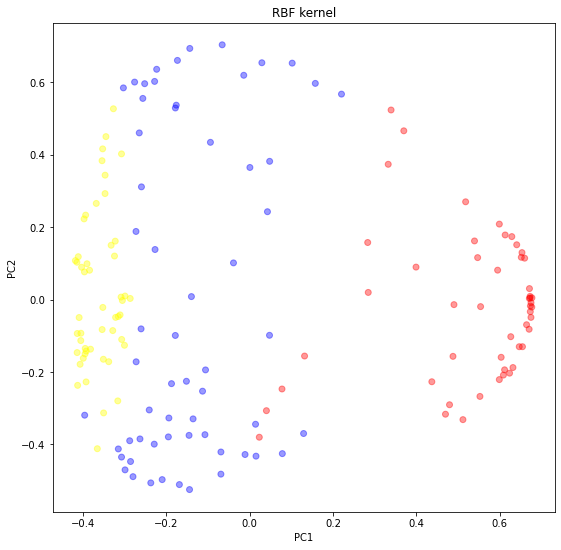

In [15]:
plot_kernel_pca(
    KernelPCA(gamma=0.25, kernel='rbf'),
    data4_r,
    [['red', 'blue', 'yellow'][i] for i in data4_l.astype(int) - 1],
    'RBF kernel'
)

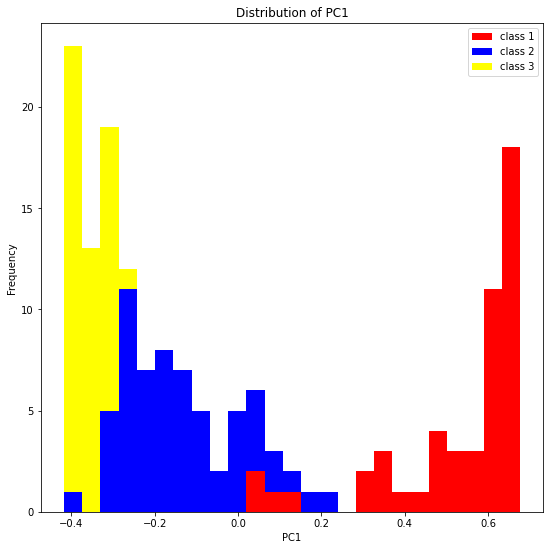

In [16]:
pca_kernel = KernelPCA(n_components=1, gamma=0.25, kernel='rbf').fit(data4_r)
transformed = pca_kernel.transform(data4_r).ravel()

red = transformed[data4_l == 1]
blue = transformed[data4_l == 2]
yellow = transformed[data4_l == 3]

plt.figure(figsize=(9, 9))
plt.hist([red, blue, yellow], bins=25, stacked=True, color=['red', 'blue', 'yellow'])
plt.title('Distribution of PC1')
plt.xlabel('PC1')
plt.ylabel('Frequency')
plt.legend([f'class {i}' for i in [1, 2, 3]])
plt.show()

<h3 style="color:rgb(0,120,170)">Question 7.3:</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?

* <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 7.3:</h3>

For the first dataset we can observe that the RBF-Kernel performs worse than the Polynomial/Linear-Kernel. Data that may already be linearly separable might get distorted. 

For non-linearly seperable data (*data4*) we can easily see that the polynomial kernel does not improve the separability of the data at all. The RFB-Kernel however is almost able to linearly separate the data with the first principal component already.